In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [2]:
def load_and_preprocess_dataset():
    file_path = input("Enter the path to your dataset file: ")
    df = pd.read_csv(file_path)
    numeric_columns = df.select_dtypes(include=[np.number])
    numeric_columns.dropna(inplace=True)
    scaled_features = scaler.fit_transform(numeric_columns)
    return scaled_features, numeric_columns

In [3]:
def perform_kmeans_clustering(scaled_features, numeric_columns):
    wcss = []
    max_clusters = min(10, len(numeric_columns))
    for num_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method to Find Optimal Clusters')
    plt.show()

    num_clusters = int(input("Enter the number of clusters for K-means: "))
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    numeric_columns['Cluster'] = clusters

    plt.scatter(numeric_columns.iloc[:, 0], numeric_columns.iloc[:, 1], c=numeric_columns['Cluster'], cmap='rainbow')
    plt.xlabel(numeric_columns.columns[0])
    plt.ylabel(numeric_columns.columns[1])
    plt.title('Customer Segmentation')
    plt.show()

    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_columns.columns[:-1])
    print("\nCluster Centers:")
    print(cluster_centers_df)

Enter the path to your dataset file: D:\Personal\Internship\Internsavy\Mall_Customers.csv


C:\Users\oscur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oscur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

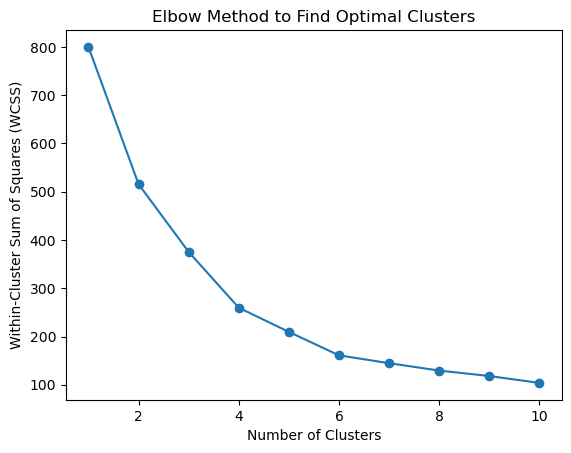

Enter the number of clusters for K-means: 150


C:\Users\oscur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


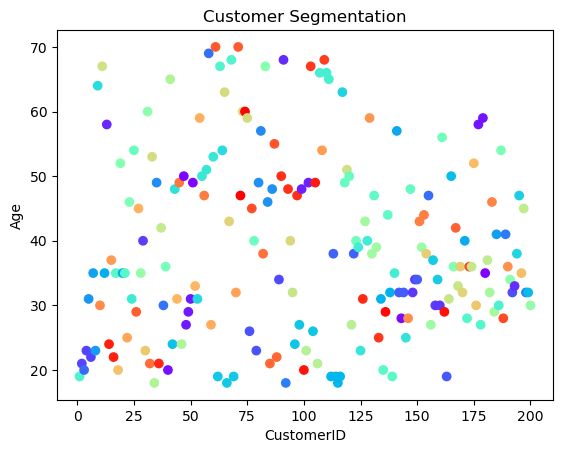


Cluster Centers:
     CustomerID   Age  Annual Income (k$)  Spending Score (1-100)
0         180.0  35.0                93.0                    90.0
1          49.0  49.5                41.0                    53.5
2         143.0  28.0                76.0                    40.0
3          40.0  20.0                37.0                    75.0
4         178.0  58.5                90.5                    14.5
..          ...   ...                 ...                     ...
145       100.0  20.0                61.0                    49.0
146       162.0  29.0                79.0                    83.0
147       136.0  29.0                73.0                    88.0
148        74.0  60.0                50.0                    56.0
149        72.0  47.0                49.0                    42.0

[150 rows x 4 columns]


In [4]:
if __name__ == "__main__":
    scaled_features, numeric_columns = load_and_preprocess_dataset()
    perform_kmeans_clustering(scaled_features, numeric_columns)